In [14]:
import pandas as pd

In [3]:
df = pd.read_csv('searches.csv', sep= '^', error_bad_lines=False, nrows= 500)

In [5]:
df.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [8]:
df.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [57]:
fields = ['Destination', 'Date']

In [58]:
dfa = pd.read_csv('searches.csv', sep= '^', skipinitialspace= True, usecols= fields)

In [59]:
dfa

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD
...,...,...
20390193,2013-10-13,NBO
20390194,2013-10-13,ALA
20390195,2013-10-13,LHR
20390196,2013-10-13,MAD


Codigos para Madrid Barcelona y Málaga

Málaga = AGP

MADRID = MAD

BARCELONA = BCN


In [60]:
search_dest = dfa

In [61]:
search_dest["Destination"][0]

'AUH'

In [62]:
mad_bcn_agp = search_dest[(search_dest["Destination"] == "MAD") | (search_dest["Destination"] == "BCN") | (search_dest["Destination"] == "AGP")]

In [63]:
mad_bcn_agp.reset_index(inplace=True)
mad_bcn_agp

,index,Date,Destination
0,4,2013-01-01,MAD
1,93,2013-01-01,AGP
2,113,2013-01-01,BCN
3,147,2013-01-01,AGP
4,151,2013-01-01,MAD
...,...,...,...
676377,20389978,2013-10-13,BCN
676378,20390045,2013-10-13,MAD
676379,20390073,2013-10-13,AGP
676380,20390160,2013-10-13,MAD


In [56]:
#The key here is separate it by month

#Reseteamos el indice para que empiece el 0

In [64]:
mad_bcn_agp.drop("index", axis = 1, inplace=True)

C:\Users\ORTEGA\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
mad_bcn_agp

,Date,Destination
0,2013-01-01,MAD
1,2013-01-01,AGP
2,2013-01-01,BCN
3,2013-01-01,AGP
4,2013-01-01,MAD
...,...,...
676377,2013-10-13,BCN
676378,2013-10-13,MAD
676379,2013-10-13,AGP
676380,2013-10-13,MAD


In [70]:
#Cogemos el mes
Date_split = mad_bcn_agp["Date"].str.split("-", expand = True)

In [72]:
Date_split

,0,1,2
0,2013,01,01
1,2013,01,01
2,2013,01,01
3,2013,01,01
4,2013,01,01
...,...,...,...
676377,2013,10,13
676378,2013,10,13
676379,2013,10,13
676380,2013,10,13


In [73]:
mad_bcn_agp["month"] = Date_split[1]

C:\Users\ORTEGA\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
mad_bcn_agp

,Date,Destination,month
0,2013-01-01,MAD,01
1,2013-01-01,AGP,01
2,2013-01-01,BCN,01
3,2013-01-01,AGP,01
4,2013-01-01,MAD,01
...,...,...,...
676377,2013-10-13,BCN,10
676378,2013-10-13,MAD,10
676379,2013-10-13,AGP,10
676380,2013-10-13,MAD,10


In [93]:
s = mad_bcn_agp.groupby(["month","Destination"]).count()

In [95]:
s["number"] = s["Date"]

In [98]:
s.drop("Date", axis=1, inplace = True)

In [101]:
s.to_excel("Exercise 3.xls")

In [102]:
d = s.reset_index()

In [103]:
d

,month,Destination,number
0,01,AGP,9633
1,01,BCN,29469
2,01,MAD,24258
3,02,AGP,8379
4,02,BCN,28329
5,02,MAD,22800
6,03,AGP,10659
7,03,BCN,30552
8,03,MAD,24681
9,04,AGP,8265


In [ ]:
d.to_excel("")

In [77]:
import seaborn as sns

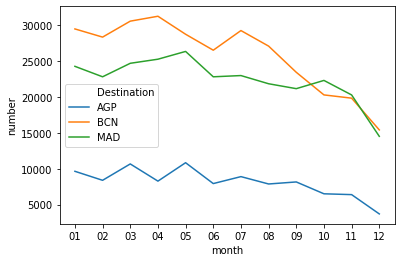

In [104]:
sns.lineplot(d["month"], d["number"], hue=d["Destination"])